Task 1

In this task, you are required to implement an Artificial Neural Network (ANN) model with the architecture outlined in Figure 1. You will train the model using the Heart Disease Dataset, a binary classification dataset.  Thefeatures were collected for 303 patients. The target variable represents the diagnosis of the patients, i.e. 0 – no risk of heart disease, 1 – at risk of heart disease. Implementation requirements: You must implement the neural network from scratch using linear algebra operations. Do not use any off-the-shelf machine learning libraries unless explicitly allowed in the assessment criteria. Follow the specifications below to complete the task:

1. Upload the Heart Disease Dataset from the provided file (heart-disease.csv).
2. Initialize the weights using a uniform distribution with values ranging between      -1 and 1 and set the biases to 0.
3. Use mini-batch gradient descent and backpropagation to train the network.
4. Set 128 as the size of the mini batch, 0.01 as the value of the learning rate,       and 500 as the number of training epochs.
5. Visualize the loss and classification accuracy during different stages of the        training process to evaluate if the model is learning correctly.
6. Print the final accuracy and the loss obtained by the model on the Heart Disease     Dataset.

In [199]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics 

# Load data
data = pd.read_csv('heart-disease.csv')

x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values.reshape(-1,1)
y = y.reshape(len(y),1)

print(x.shape)
print(y.shape)

(303, 13)
(303, 1)


In [202]:
# Activation Functions
def sigmoid(v):
    return 1/(1+np.exp(-v))

def sigmoid_derivative(v):
    return sigmoid(v) * (1 - (1/(1+np.exp(-v))))
    
def crossEntrop(o,y):
    return (-y*(np.log(o)) - (1-y)* np.log(1-o))

def crossEntrDeriv(o,y):
    return -(y/o - (1-y)/(1-o))

In [204]:
# Hyperparameters
input_nodes = x.shape[1]
hidden_nodes = 5
output_nodes = 1
learning_rate = 0.01
epochs = 500
mini_batch = 128

In [232]:
# Initialising Weights and Biases
np.random.seed(42)
w1 = np.random.uniform(-1, 1, (input_nodes, hidden_nodes))
b1 = np.zeros((1, hidden_nodes))
w2 = np.random.uniform(-1, 1, (hidden_nodes, output_nodes))
b2 = np.zeros((1, output_nodes))

# Arrays used for initial training / testing, but changed to fit Task 1 better
train_E = []
train_Acc = []

for epoch in range(epochs):
    in1 = x @ w1 + b1
    out1 = sigmoid(in1)
    in2 = out1 @ w2 + b2
    out2 = sigmoid(in2)

    train_error_epoch = []
    train_acc_epoch = []
    
    for i in range(0, len(x), mini_batch):
        x_batch = x[i:i + mini_batch-1,:]
        y_batch = y[i:i + mini_batch-1]
        
        in1 = x_batch @ w1 + b1
        out1 = sigmoid(in1)
        in2 = out1 @ w2 + b2
        out2 = sigmoid(in2)
        
        # Error
        error = crossEntrop(out2, y_batch).mean()
        train_error_epoch.append(error)

        # Compute accuracy -add
        pred_train = np.where(out2 > 0.5, 1, 0)
        train_acc_epoch.append(metrics.accuracy_score(y_batch, pred_train))

        
        # Backpropagation L2
        dEdOut2 = crossEntrDeriv(out2, y_batch)
        dOut2dIn2 = sigmoid_derivative(in2)
        dIn2dW2 = out1
        dIn2dB2 = 1
        dEdW2 = (1 / x_batch.shape[0]) * dIn2dW2.T @ (dEdOut2 * dOut2dIn2)
        dEdB2 = (1 / x_batch.shape[0]) * np.ones([1, x_batch.shape[0]]) @ (dEdOut2 * dOut2dIn2)
        
        # Backpropagation L1
        dIn2dOut1 = w2
        dOut1dIn1 = sigmoid_derivative(in1)
        dIn1dW1 = x_batch
        dEdW1 = (1 / x_batch.shape[0]) * dIn1dW1.T @ ((dEdOut2 * dOut2dIn2 @ dIn2dOut1.T) * dOut1dIn1)
        dEdB1 = (1 / x_batch.shape[0]) * np.ones([len(x_batch)]) @ ((dEdOut2 * dOut2dIn2 @ dIn2dOut1.T) * dOut1dIn1)
        
        # Update Params
        b2 -= learning_rate * dEdB2
        w2 -= learning_rate * dEdW2
        b1 -= learning_rate * dEdB1
        w1 -= learning_rate * dEdW1
    
    # Store final values for the epoch
    train_E.append(np.mean(train_error_epoch))
    train_Acc.append(np.mean(train_acc_epoch))
    
    if epoch % 50 == 0:
        print(f"Epoch {epoch} - Loss: {train_E[-1]:.4f}, Accuracy: {train_Acc[-1]:.4f}")

training_final_loss = train_E[-1]
training_final_acc = train_Acc[-1]

print(f"Epoch 500 - Final Loss: {training_final_loss:.4f}, Final Accuracy: {training_final_acc:.4f}")

Epoch 0 - Loss: 0.7330, Accuracy: 0.3596
Epoch 50 - Loss: 0.6890, Accuracy: 0.5696
Epoch 100 - Loss: 0.6862, Accuracy: 0.5696
Epoch 150 - Loss: 0.6856, Accuracy: 0.5696
Epoch 200 - Loss: 0.6855, Accuracy: 0.5696
Epoch 250 - Loss: 0.6855, Accuracy: 0.5696
Epoch 300 - Loss: 0.6854, Accuracy: 0.5696
Epoch 350 - Loss: 0.6854, Accuracy: 0.5696
Epoch 400 - Loss: 0.6854, Accuracy: 0.5696
Epoch 450 - Loss: 0.6854, Accuracy: 0.5696
Epoch 500 - Final Loss: 0.6854, Final Accuracy: 0.5696


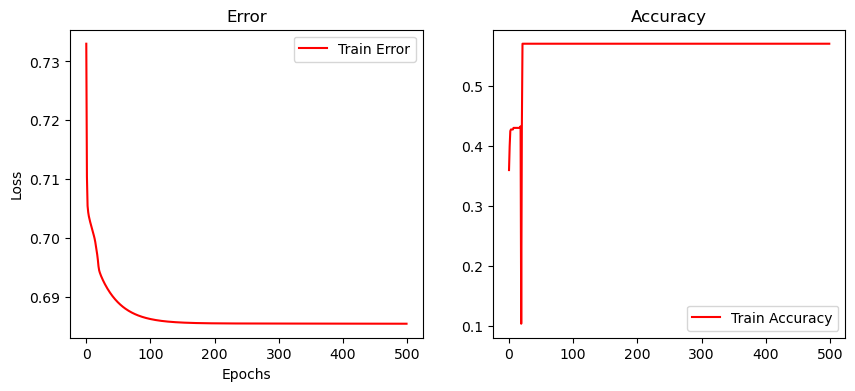

In [234]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Plotting the epochs against the Error and Accuracy
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
z = np.arange(epochs)
plt.plot(z,train_E, label = "Train Error", color = 'red')
plt.legend(loc='best')
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)

plt.plot(z,train_Acc,label = "Train Accuracy",color = 'red')
plt.legend(loc='best')
plt.title('Accuracy')
plt.show()